In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [42]:
ze_data = pd.read_csv('Data/Ze_Data_orders.csv')
ze_data.head()

,order_date,order_nk,customer_bk,coupon_code,is_first_order,gmv,discount,delivery_discount,delivery_charged
0,2016-02-10,177562,a508983603628f103dd349cecd1138bbab48db6f436520...,NaN,True,84.62,0.0,0.0,5.0
1,2016-02-10,177563,a508983603628f103dd349cecd1138bbab48db6f436520...,NaN,False,123.05,0.0,0.0,5.0
2,2016-02-10,177564,a508983603628f103dd349cecd1138bbab48db6f436520...,NaN,False,56.48,0.0,0.0,5.0
3,2016-02-10,177565,a508983603628f103dd349cecd1138bbab48db6f436520...,NaN,False,48.35,0.0,0.0,5.0
4,2016-02-10,177566,a508983603628f103dd349cecd1138bbab48db6f436520...,NaN,False,79.22,0.0,0.0,5.0


In [61]:
ze_data.drop(columns = ['order_nk', 'customer_bk', 'coupon_code'], inplace = True)
ze_data['order_date'] = pd.to_datetime(ze_data['order_date'])
ze_data['is_first_order'] = ze_data['is_first_order'].astype(int)
ze_data.sort_values(by = 'order_date', inplace = True)

print(ze_data.shape)
ze_data.head(10)

,order_date,is_first_order,gmv,discount,delivery_discount,delivery_charged
0,2016-02-10,1,84.62,0.0,0.0,5.0
1,2016-02-10,0,123.05,0.0,0.0,5.0
2,2016-02-10,0,56.48,0.0,0.0,5.0
3,2016-02-10,0,48.35,0.0,0.0,5.0
4,2016-02-10,0,79.22,0.0,0.0,5.0
5,2016-02-11,1,84.62,0.0,0.0,9.0
6,2016-02-11,0,84.62,0.0,0.0,9.0
7,2016-02-12,0,58.88,0.0,0.0,9.0
8,2016-02-13,1,99.80,0.0,0.0,9.0
12,2016-02-15,0,49.90,0.0,0.0,5.0


In [113]:
start_date = min(ze_data['order_date'])
end_date = max(ze_data['order_date'])
print(start_date, '\t', end_date)

2016-02-10 00:00:00 	 2020-05-18 00:00:00


In [67]:
new_customers = ze_data.loc[ze_data['is_first_order'] == 1].groupby('order_date').is_first_order.count()
number_of_orders = ze_data.groupby('order_date').gmv.count()
delivery_discount = ze_data.groupby('order_date').delivery_discount.sum()
total_delivery_charged = ze_data.groupby('order_date').delivery_charged.sum()
total_revenue = ze_data.groupby('order_date').gmv.sum()

In [68]:
print(new_customers.shape)
print(number_of_orders.shape)
print(delivery_discount.shape)
print(total_delivery_charged.shape)
print(total_revenue.shape)

(1497,)
(1526,)
(1526,)
(1526,)
(1526,)


In [77]:
ze_consolidated = pd.DataFrame(columns = ['new_customers', 'number_of_orders', 'total_delivery_charged', 
                                          'delivery_discount', 'total_revenue'], index = number_of_orders.index)

ze_consolidated['new_customers'] = new_customers
ze_consolidated['new_customers'] = ze_consolidated.new_customers.fillna(0)
ze_consolidated['number_of_orders'] = number_of_orders.values
ze_consolidated['delivery_discount'] = delivery_discount.values
ze_consolidated['total_delivery_charged'] = total_delivery_charged.values
ze_consolidated['total_revenue'] = total_revenue.values

print(ze_consolidated.shape)
ze_consolidated.head()

(1526, 5)


,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue
order_date,,,,,
2016-02-10,1.0,5,25.0,0.0,391.72
2016-02-11,1.0,2,18.0,0.0,169.24
2016-02-12,0.0,1,9.0,0.0,58.88
2016-02-13,1.0,1,9.0,0.0,99.80
2016-02-15,0.0,4,24.0,0.0,710.35


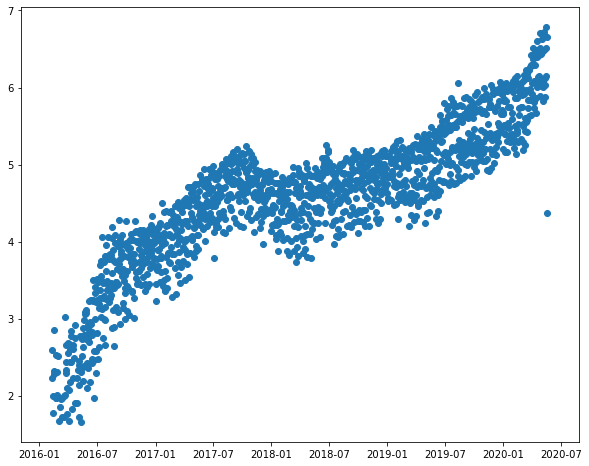

In [88]:
ax = plt.figure(figsize=(10,8))
plt.scatter(ze_consolidated.index, np.log10(ze_consolidated.total_revenue))

In [89]:
marketing_data = pd.read_csv('Data/Ze_Data_marketing.csv')
marketing_data.head()

,source,media_source,medium,campaign,reference_date,impressions,clicks,reported_transactions,reported_revenue_local,reported_revenue_usd,cost_local,cost_usd
0,courier_ze,voxus,display,320x50_budweiser_generica,2017-01-15,1320,7,0,0.00,0.0000,0.0000,0.0000
1,courier_ze,zanox,afiliados,(not set),2017-05-11,0,0,3,85.07,26.5708,10.2084,3.1885
2,courier_ze,voxus,display,voxus_display_programatica_300x600_cpa_mensal_...,2017-03-01,2445,12,0,0.00,0.0000,0.0000,0.0000
3,courier_ze,voxus,display,728x90_budweiser_generica,2017-02-21,276,1,0,0.00,0.0000,0.0000,0.0000
4,courier_ze,voxus,facebook,nf_longneck_premium_preco,2017-01-15,140537,666,0,0.00,0.0000,839.1600,262.1032


In [90]:
marketing_data.drop(columns = ['source', 'media_source', 'medium', 'impressions', 
                               'clicks', 'reported_revenue_usd', 'cost_usd'], inplace=True)
marketing_data['net_revenue'] = marketing_data['reported_revenue_local'] - marketing_data['cost_local']
marketing_data['reference_date'] = pd.to_datetime(marketing_data['reference_date'])

marketing_data.head()

,campaign,reference_date,reported_transactions,reported_revenue_local,cost_local,net_revenue
0,320x50_budweiser_generica,2017-01-15,0,0.00,0.0000,0.0000
1,(not set),2017-05-11,3,85.07,10.2084,74.8616
2,voxus_display_programatica_300x600_cpa_mensal_...,2017-03-01,0,0.00,0.0000,0.0000
3,728x90_budweiser_generica,2017-02-21,0,0.00,0.0000,0.0000
4,nf_longneck_premium_preco,2017-01-15,0,0.00,839.1600,-839.1600


In [91]:
marketing_data.columns

Index(['campaign', 'reference_date', 'reported_transactions',
       'reported_revenue_local', 'cost_local', 'net_revenue'],
      dtype='object')

In [99]:
marketing_data.sort_values(by='reference_date', inplace=True)
marketing_data.index = marketing_data['reference_date']

marketing_data.head()

,campaign,reference_date,reported_transactions,reported_revenue_local,cost_local,net_revenue
reference_date,,,,,,
2016-10-05,testes,2016-10-05,1,81.00,9.7200,71.2800
2016-10-07,20161005_cupommeliuz,2016-10-07,1,25.47,3.0564,22.4136
2016-10-08,20161005_cupommeliuz,2016-10-08,1,7.98,0.9576,7.0224
2016-10-12,20161005_cupommeliuz,2016-10-12,1,7.30,0.8760,6.4240
2016-10-14,20161005_cupommeliuz,2016-10-14,2,42.38,5.0856,37.2944


In [102]:
stats_data = marketing_data[['reported_transactions', 'reported_revenue_local', 'cost_local', 'net_revenue']]
ze_consolidated = ze_consolidated.join(stats_data, how = 'left')

ze_consolidated['reported_transactions'].fillna(0, inplace=True)
ze_consolidated['reported_revenue_local'].fillna(0, inplace=True)
ze_consolidated['cost_local'].fillna(0, inplace=True)
ze_consolidated['net_revenue'].fillna(0, inplace=True)

ze_consolidated.head()

,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue
2016-02-10,1.0,5,25.0,0.0,391.72,0.0,0.0,0.0,0.0
2016-02-11,1.0,2,18.0,0.0,169.24,0.0,0.0,0.0,0.0
2016-02-12,0.0,1,9.0,0.0,58.88,0.0,0.0,0.0,0.0
2016-02-13,1.0,1,9.0,0.0,99.80,0.0,0.0,0.0,0.0
2016-02-15,0.0,4,24.0,0.0,710.35,0.0,0.0,0.0,0.0


In [103]:
ze_consolidated['gross_total_revenue'] = ze_consolidated['total_revenue'] + ze_consolidated['net_revenue']
ze_consolidated.head()

,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,gross_total_revenue
2016-02-10,1.0,5,25.0,0.0,391.72,0.0,0.0,0.0,0.0,391.72
2016-02-11,1.0,2,18.0,0.0,169.24,0.0,0.0,0.0,0.0,169.24
2016-02-12,0.0,1,9.0,0.0,58.88,0.0,0.0,0.0,0.0,58.88
2016-02-13,1.0,1,9.0,0.0,99.80,0.0,0.0,0.0,0.0,99.80
2016-02-15,0.0,4,24.0,0.0,710.35,0.0,0.0,0.0,0.0,710.35


In [1]:
import holidays

In [4]:
br_holidays = holidays.CountryHoliday('BR', years=[2017, 2018, 2019, 2020])
list_holidays_br = []
for date, name in br_holidays.items():
    print(date, name)
    
list_holidays_br

2017-01-01 Ano novo
2017-04-21 Tiradentes
2017-05-01 Dia Mundial do Trabalho
2017-09-07 Independência do Brasil
2017-10-12 Nossa Senhora Aparecida
2017-11-02 Finados
2017-11-15 Proclamação da República
2017-12-25 Natal
2017-04-14 Sexta-feira Santa
2017-04-16 Páscoa
2017-06-15 Corpus Christi
2017-03-01 Quarta-feira de cinzas (Início da Quaresma)
2017-02-28 Carnaval
2018-01-01 Ano novo
2018-04-21 Tiradentes
2018-05-01 Dia Mundial do Trabalho
2018-09-07 Independência do Brasil
2018-10-12 Nossa Senhora Aparecida
2018-11-02 Finados
2018-11-15 Proclamação da República
2018-12-25 Natal
2018-03-30 Sexta-feira Santa
2018-04-01 Páscoa
2018-05-31 Corpus Christi
2018-02-14 Quarta-feira de cinzas (Início da Quaresma)
2018-02-13 Carnaval
2019-01-01 Ano novo
2019-04-21 Páscoa, Tiradentes
2019-05-01 Dia Mundial do Trabalho
2019-09-07 Independência do Brasil
2019-10-12 Nossa Senhora Aparecida
2019-11-02 Finados
2019-11-15 Proclamação da República
2019-12-25 Natal
2019-04-19 Sexta-feira Santa
2019-06-20

[]

In [197]:
# list_holidays_br = ['Ano novo', 'Tiradentes', 'Dia Mundial do Trabalho', 'Independência do Brasil', 
#                      'Nossa Senhora Aparecida', 'Finados', 'Proclamação da República', 'Natal', 'Sexta-feira Santa', 
#                      'Páscoa', 'Corpus Christi', 'Quarta-feira de cinzas (Início da Quaresma)', 'Carnaval']

holidays_data = pd.DataFrame(columns = list_holidays_br, index=pd.date_range(start_date, end_date))
holidays_data.fillna(0,inplace=True)

year_range = []
for i in range(start_date.year, end_date.year + 1):
    year_range.append(i)
    
for date, name in holidays.CountryHoliday('BR', years=year_range).items():
    for i in name.split(', '):
        holidays_data['{}'.format(i)]['{}'.format(date)] = 1
        
# holidays_data.index[0] == pd.to_datetime('2016-02-10')
holidays_data.head()

,Ano novo,Tiradentes,Dia Mundial do Trabalho,Independência do Brasil,Nossa Senhora Aparecida,Finados,Proclamação da República,Natal,Sexta-feira Santa,Páscoa,Corpus Christi,Quarta-feira de cinzas (Início da Quaresma),Carnaval
2016-02-10,0,0,0,0,0,0,0,0,0,0,0,1,0
2016-02-11,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-12,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-13,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-14,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
ze_consolidated_with_holidays = ze_consolidated.join(holidays_data, how='left')
ze_consolidated_with_holidays

,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,gross_total_revenue,...,Independência do Brasil,Nossa Senhora Aparecida,Finados,Proclamação da República,Natal,Sexta-feira Santa,Páscoa,Corpus Christi,Quarta-feira de cinzas (Início da Quaresma),Carnaval
2016-02-10,1.0,5,25.000000,0.0000,3.917200e+02,0.0,0.0,0.0,0.0,3.917200e+02,...,0,0,0,0,0,0,0,0,1,0
2016-02-11,1.0,2,18.000000,0.0000,1.692400e+02,0.0,0.0,0.0,0.0,1.692400e+02,...,0,0,0,0,0,0,0,0,0,0
2016-02-12,0.0,1,9.000000,0.0000,5.888000e+01,0.0,0.0,0.0,0.0,5.888000e+01,...,0,0,0,0,0,0,0,0,0,0
2016-02-13,1.0,1,9.000000,0.0000,9.980000e+01,0.0,0.0,0.0,0.0,9.980000e+01,...,0,0,0,0,0,0,0,0,0,0
2016-02-15,0.0,4,24.000000,0.0000,7.103500e+02,0.0,0.0,0.0,0.0,7.103500e+02,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,5606.0,32082,105890.612900,39152.0183,1.408149e+06,0.0,0.0,0.0,0.0,1.408149e+06,...,0,0,0,0,0,0,0,0,0,0
2020-05-15,13834.0,69792,244455.339800,75181.8005,3.248028e+06,0.0,0.0,0.0,0.0,3.248028e+06,...,0,0,0,0,0,0,0,0,0,0
2020-05-16,25067.0,127158,451743.819699,127835.9921,6.064646e+06,0.0,0.0,0.0,0.0,6.064646e+06,...,0,0,0,0,0,0,0,0,0,0
2020-05-17,18599.0,103557,376045.535200,89452.5352,4.553283e+06,0.0,0.0,0.0,0.0,4.553283e+06,...,0,0,0,0,0,0,0,0,0,0


In [199]:
ze_consolidated_with_holidays.to_csv('Consolidated_Ze_Data.csv')

In [32]:
plot_data = pd.read_csv('Data/Zx_consolidated_stats.csv')
# plot_data.index = plot_data.Month
plot_data

,Month,Business,Revenue (USD)
0,January,Ze,3.550381e+06
1,January,UK_Atom,3.202197e+06
2,January,Others,3.738404e+06
3,February,UK_Atom,4.696122e+06
4,February,Ze,4.670622e+06
5,February,Others,4.158287e+06
6,March,Ze,6.648302e+06
7,March,UK_Atom,5.250580e+06
8,March,Others,5.021585e+06
9,April,Ze,1.450637e+07


In [51]:
plot_data[plot_data['Business']=='Others']['Revenue (USD)'].values.astype(float)

array([3738404.5  , 4158286.554, 5021585.304, 6531376.811, 6445611.776])

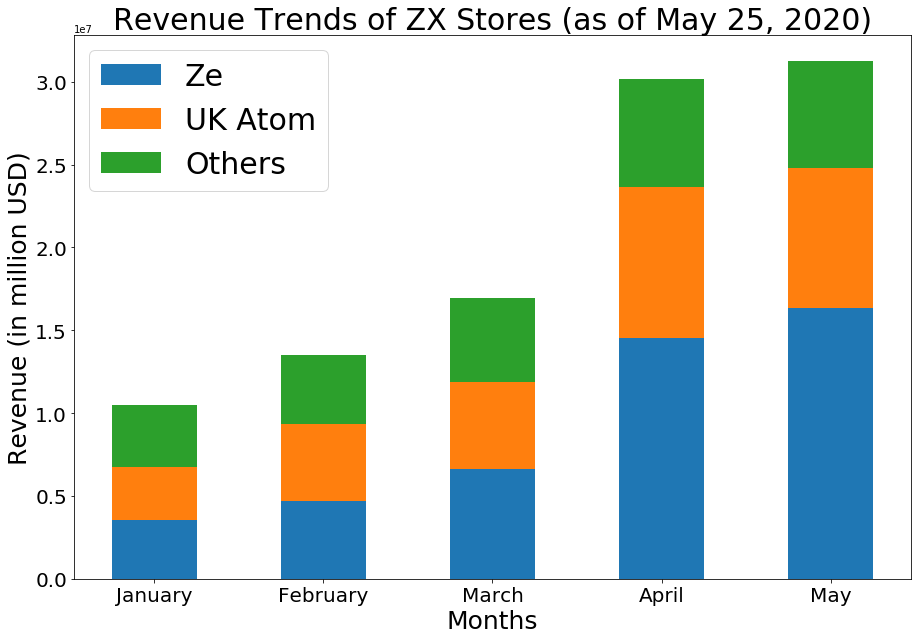

In [71]:
# p1 = plot_data[plot_data['Business']=='Ze'].plot(kind='bar')
# p2 = plot_data[plot_data['Business']=='UK_Atom'].plot(kind='bar', bottom=p1)
# p3 = plot_data[plot_data['Business']=='Others'].plot(kind='bar', bottom = p1+p2)
arr1 = plot_data[plot_data['Business']=='Ze']['Revenue (USD)'].values.astype(float)
arr2 = plot_data[plot_data['Business']=='UK_Atom']['Revenue (USD)'].values.astype(float)
arr3 = plot_data[plot_data['Business']=='Others']['Revenue (USD)'].values.astype(float)
ind = np.arange(0,5)
ax = plt.figure(figsize=(15,10))
p1 = plt.bar(ind, arr1, width = 0.5)
p2 = plt.bar(ind, arr2, width = 0.5, bottom = arr1)
p3 = plt.bar(ind, arr3, width = 0.5, bottom = arr1+arr2)
plt.ylabel('Revenue (in million USD)', fontsize=25)
plt.xlabel('Months', fontsize=25)
plt.title('Revenue Trends of ZX Stores (as of May 25, 2020)', fontsize=30)
plt.xticks(ind, ('January', 'February', 'March', 'April', 'May'), fontsize=20)
plt.yticks(fontsize=20)
plt.legend((p1[0], p2[0], p3[0]), ('Ze', 'UK Atom', "Others"), fontsize=30)
plt.show()

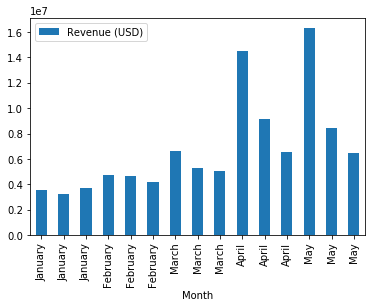

In [31]:
plot_data.plot(kind='bar', stacked=True)

In [72]:
order_data = pd.read_csv('Data/ZX_Orders_Data.csv')
order_data

,Order Month,Source,Total Orders
0,January,Ze Delivery,389019
1,February,Ze Delivery,519814
2,March,Ze Delivery,813466
3,April,Ze Delivery,1830038
4,May,Ze Delivery,2076584


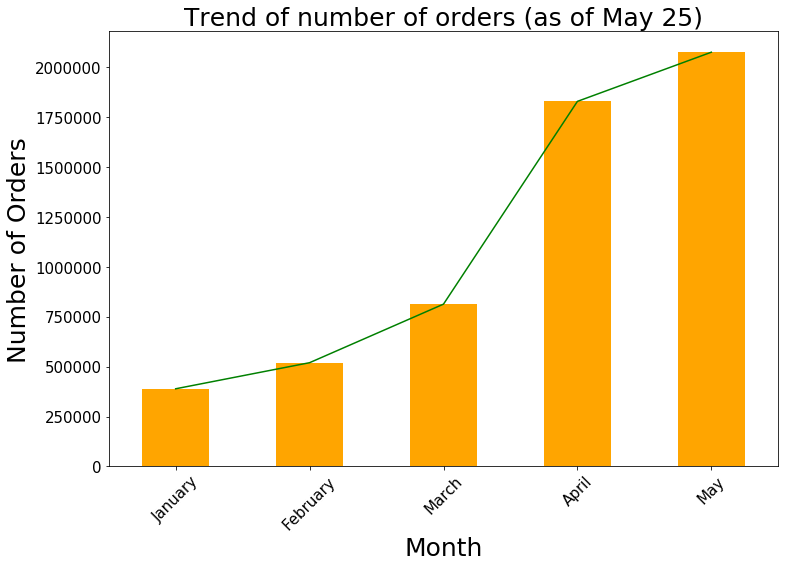

In [122]:
ax = plt.figure(figsize=(12,8))
order_data['Total Orders'].plot(kind='bar', color='orange')
plt.plot(order_data['Total Orders'], color='green')
plt.title('Trend of number of orders (as of May 25)', fontsize=25)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Number of Orders', fontsize=25)
plt.xticks((0,1,2,3,4), ('January', 'February', 'March', 'April', 'May'), fontsize=15, rotation = 45)
plt.yticks(fontsize=15)
plt.show()

In [86]:
cust_df = pd.read_csv('Data/customer_data_ze.csv')
cust_df.head()

,order_nk,order_date,order_month,customer_first_order_date
0,4450642,2020-04-10,4,2019-10-26
1,4358613,2020-04-08,4,2020-04-08
2,4450584,2020-04-10,4,2020-04-10
3,4357740,2020-04-08,4,2019-10-25
4,4431333,2020-04-10,4,2019-06-23


In [88]:
new_cust_df = cust_df[cust_df['order_date'] == cust_df['customer_first_order_date']].sort_values('order_date')
new_cust_df

,order_nk,order_date,order_month,customer_first_order_date
5409771,586983,2019-01-13,1,2019-01-13
689227,587219,2019-01-13,1,2019-01-13
69802,587636,2019-01-13,1,2019-01-13
75005,588507,2019-01-13,1,2019-01-13
689262,587670,2019-01-13,1,2019-01-13
...,...,...,...,...
3797383,7293296,2020-05-26,5,2020-05-26
3298785,7293392,2020-05-26,5,2020-05-26
3634178,7293145,2020-05-26,5,2020-05-26
3634197,7293104,2020-05-26,5,2020-05-26


In [89]:
min(cust_df['order_date'])

'2019-01-13'

In [110]:
total_cust_agg = cust_df[cust_df['order_date']>='2019-12-01'].groupby('order_month').order_nk.count()
total_cust_agg

order_month
1      400104
2      519814
3      813466
4     1830038
5     2109042
12     402867
Name: order_nk, dtype: int64

In [93]:
new_cust_recent = new_cust_df[new_cust_df['order_date']>='2019-12-01']
new_cust_recent

,order_nk,order_date,order_month,customer_first_order_date
567620,2102397,2019-12-01,12,2019-12-01
67339,2101931,2019-12-01,12,2019-12-01
6345922,2088673,2019-12-01,12,2019-12-01
620854,2098251,2019-12-01,12,2019-12-01
692711,2097647,2019-12-01,12,2019-12-01
...,...,...,...,...
3797383,7293296,2020-05-26,5,2020-05-26
3298785,7293392,2020-05-26,5,2020-05-26
3634178,7293145,2020-05-26,5,2020-05-26
3634197,7293104,2020-05-26,5,2020-05-26


In [101]:
new_cust_monthwise = new_cust_recent.groupby('order_month').order_nk.count()
new_cust_monthwise

order_month
1      75859
2     103953
3     191625
4     431619
5     423326
12     80987
Name: order_nk, dtype: int64

In [95]:
customer_data = pd.DataFrame(columns = ['Month', 'New Customers', 'Retained Customers'])
customer_data['Month'] = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020']
customer_data

,Month,New Customers,Retained Customers
0,Dec 2019,NaN,NaN
1,Jan 2020,NaN,NaN
2,Feb 2020,NaN,NaN
3,Mar 2020,NaN,NaN
4,Apr 2020,NaN,NaN
5,May 2020,NaN,NaN


In [109]:
customer_data['New Customers'][0] = new_cust_monthwise.iloc[-1]
customer_data['New Customers'][1:] = new_cust_monthwise.iloc[:-1]
customer_data

,Month,New Customers,Retained Customers
0,Dec 2019,80987,NaN
1,Jan 2020,75859,NaN
2,Feb 2020,103953,NaN
3,Mar 2020,191625,NaN
4,Apr 2020,431619,NaN
5,May 2020,423326,NaN


In [111]:
customer_data['Retained Customers'][0] = total_cust_agg.iloc[-1] - customer_data['New Customers'][0]
customer_data['Retained Customers'][1:] = total_cust_agg.iloc[:-1] - customer_data['New Customers'][1:]
customer_data

<ipython-input-111-941b456bb6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Retained Customers'][0] = total_cust_agg.iloc[-1] - customer_data['New Customers'][0]
<ipython-input-111-941b456bb6da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Retained Customers'][1:] = total_cust_agg.iloc[:-1] - customer_data['New Customers'][1:]


,Month,New Customers,Retained Customers
0,Dec 2019,80987,321880
1,Jan 2020,75859,324245
2,Feb 2020,103953,415861
3,Mar 2020,191625,621841
4,Apr 2020,431619,1398419
5,May 2020,423326,1685716


[]

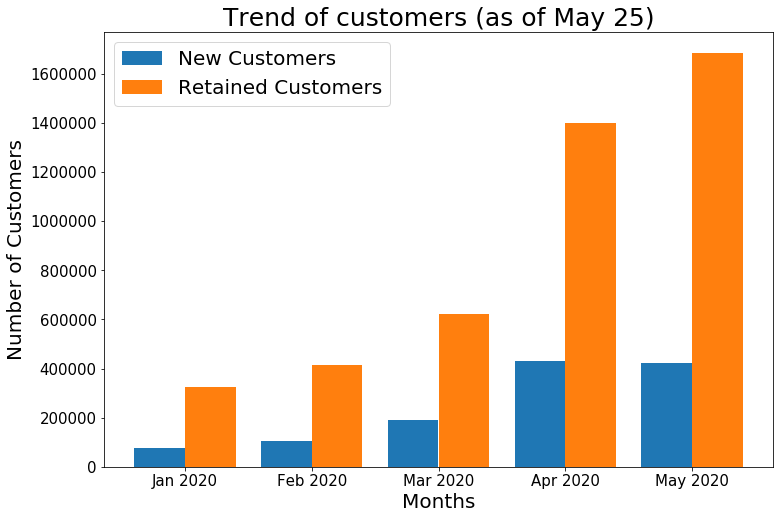

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(5)
width = 0.4
rects1 = ax.bar(x-width/2, customer_data['New Customers'][1:], width, label='New Customers')
rects2 = ax.bar(x+width/2, customer_data['Retained Customers'][1:], width, label='Retained Customers')
plt.xticks(x, ('Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020'), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
plt.title('Trend of customers (as of May 25)', fontsize=25)
ax.legend(fontsize=20)
plt.plot()

In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('Data/arima_test_mkt.csv')
data.head()

,source,media_source,medium,campaign,reference_date,impressions,clicks,reported_transactions,reported_revenue_local,reported_revenue_usd,cost_local,cost_usd
0,courier_ze,google,cpc,entrega genérica [geral],2018-11-24,839,91,3.0,45.47,14.0511,42.7700,13.2168
1,courier_ze,google,cpc,supermercado [sp],2018-04-25,4172,58,0.0,0.00,0.0000,102.3800,31.6375
2,courier_ze,zanox,afiliados,(not set),2017-05-11,0,0,3.0,85.07,25.3908,10.2084,3.0469
3,courier_ze,google,cpc,entrega genérica [geral],2018-04-15,6892,218,4.0,75.39,23.2970,1100.0000,339.9220
4,courier_ze,google,cpc,api_android_action-purchase,2019-08-18,101113,1568,278.0,1609.89,408.5901,1001.2884,254.1270


In [9]:
data.reference_date = pd.to_datetime(data.reference_date)
# data = data[data.reference_date > '2020-05-16']
data.head()

,source,media_source,medium,campaign,reference_date,impressions,clicks,reported_transactions,reported_revenue_local,reported_revenue_usd,cost_local,cost_usd
0,courier_ze,google,cpc,entrega genérica [geral],2018-11-24,839,91,3.0,45.47,14.0511,42.7700,13.2168
1,courier_ze,google,cpc,supermercado [sp],2018-04-25,4172,58,0.0,0.00,0.0000,102.3800,31.6375
2,courier_ze,zanox,afiliados,(not set),2017-05-11,0,0,3.0,85.07,25.3908,10.2084,3.0469
3,courier_ze,google,cpc,entrega genérica [geral],2018-04-15,6892,218,4.0,75.39,23.2970,1100.0000,339.9220
4,courier_ze,google,cpc,api_android_action-purchase,2019-08-18,101113,1568,278.0,1609.89,408.5901,1001.2884,254.1270


In [10]:
max(data['reference_date'])

Timestamp('2020-03-29 00:00:00')